In [183]:
# Import libraries and misc

# To be able to use autocomplete...
%config Completer.use_jedi = False

# Essential libs
import numpy as np
import pandas as pd

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Advanced tatistical analysis tools
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Basic stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax


In [184]:
# Read data 
sample_submission = pd.read_csv('sample_submission.csv')
data_test = pd.read_csv('test.csv')
data_train = pd.read_csv('train.csv')

### First we want to analyze the data at hand

A row in the dataset describes a house using a set of characteristics (80 in total).
The goal is to predict the log(SalePrice) using our data.

In [185]:
print(data_train.head())
data_train.describe()

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


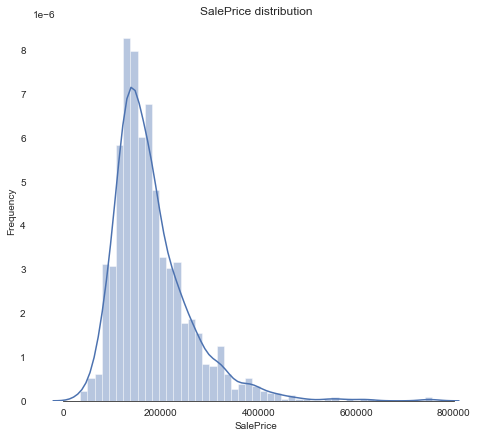

In [186]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(data_train['SalePrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

Text(0.5, 1.0, 'Correlation Plot')

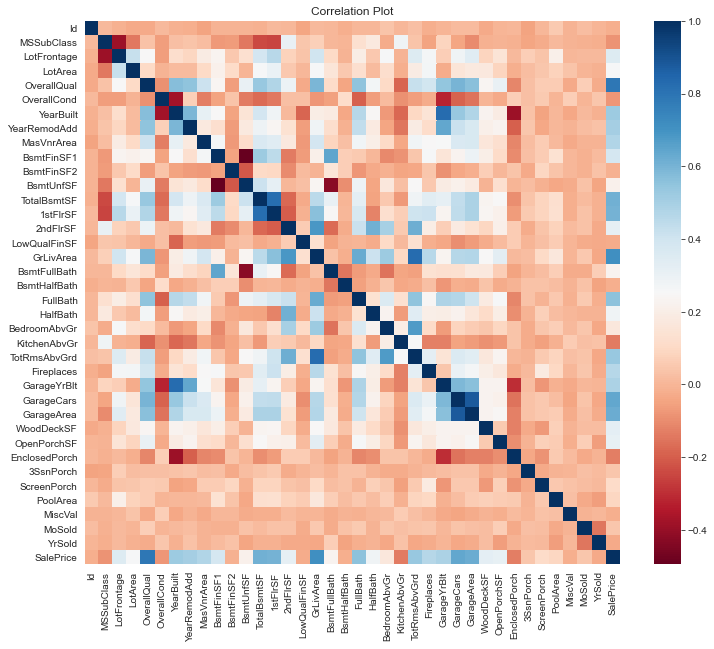

In [187]:
# Further data exploration

corr = data_train.corr()
plt.subplots(figsize = (12 , 10))
cmap = sns.heatmap(corr , cmap = 'RdBu') 
plt.title("Correlation Plot")

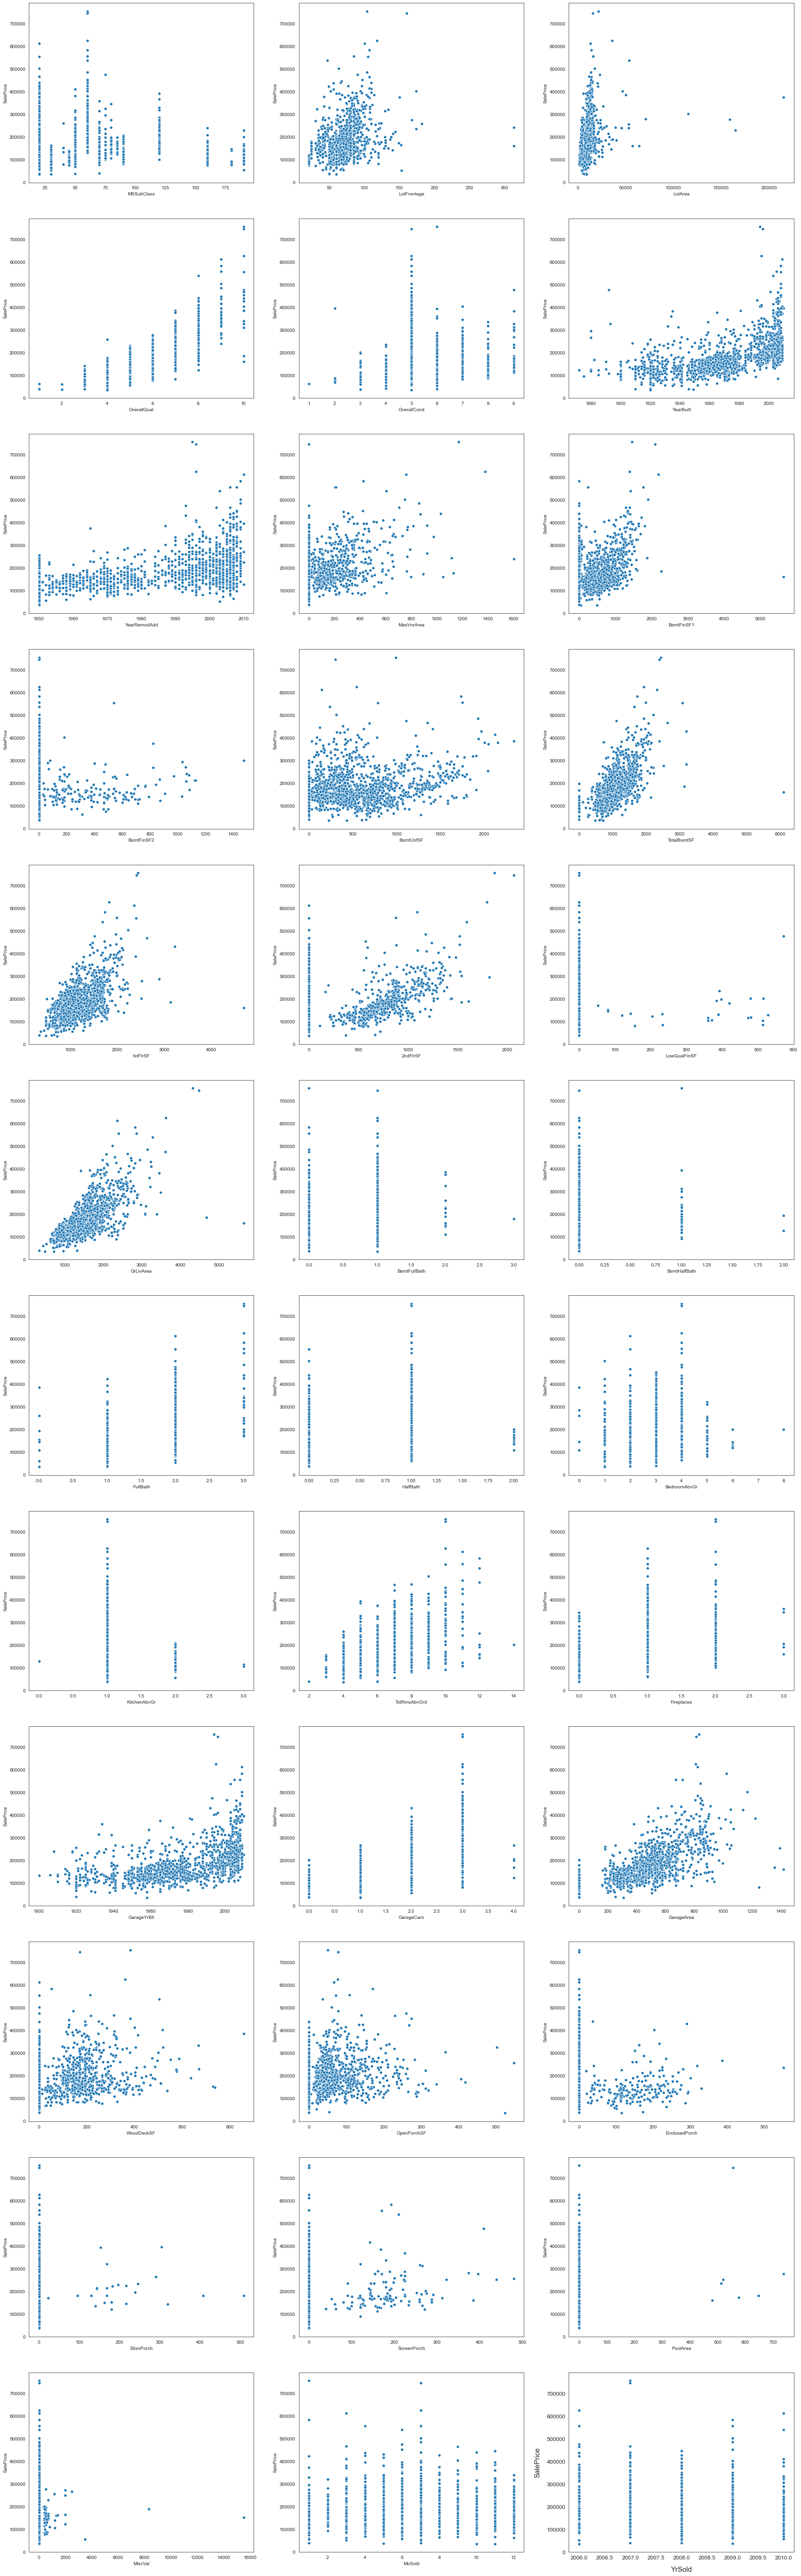

In [188]:
# Finding numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in data_train.columns:
    if data_train[i].dtype in numeric_dtypes:
        if i in ['Id','SalePrice']:
            pass
        else:
            numeric.append(i)

# visualising relationship with features
fig, axs = plt.subplots(int(1+(len(numeric)-(len(numeric)%3))/3)-1, 3, figsize=(12, 40))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

for i, feature in enumerate(list(data_train[numeric]), 1):
    
    #plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', palette='Blues', data=data_train, ax=axs[int((i-1)/3), (i-1) % 3])
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)

plt.show()

In [189]:
# Take the log of sales price
data_train['SalePrice'] = np.log(data_train['SalePrice'])


 mu = 12.02 and sigma = 0.40



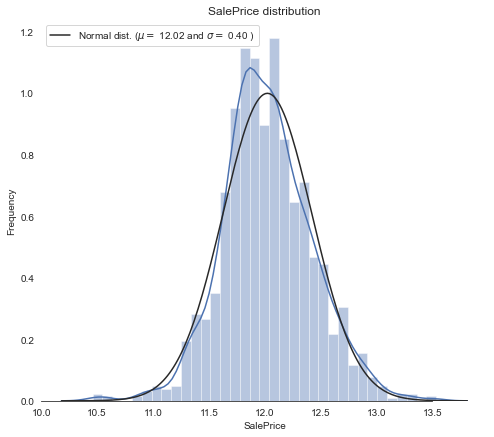

In [190]:
# Check whether it looks normally distributed

sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(data_train['SalePrice'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

In [191]:
# Remove outliers
data_train.drop(data_train[abs(data_train['SalePrice']-data_train['SalePrice'].mean()>1.2)].index, inplace=True)
data_train.reset_index(drop=True, inplace=True)
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1453.000000,1453.000000,1194.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1445.000000,1453.000000,...,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,729.727460,56.937371,69.808208,10477.187887,6.082588,5.577426,1971.119064,1984.779078,101.322491,439.491397,...,93.886442,46.457674,22.059876,3.426015,14.884377,2.390227,43.698555,6.331727,2007.816242,12.017658
std,422.121187,42.379885,24.090829,9975.688832,1.364669,1.114808,30.196081,20.652511,175.030195,449.830639,...,125.107910,66.301666,61.247240,29.386956,55.542507,37.573873,497.308264,2.700641,1.327277,0.389529
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,364.000000,20.000000,59.000000,7535.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.774520
50%,729.000000,50.000000,69.000000,9453.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,381.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.000892
75%,1095.000000,70.000000,80.000000,11526.000000,7.000000,6.000000,2000.000000,2004.000000,163.000000,706.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.270220
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.195614


In [207]:
# checking how much data is missing
total = data_train.isnull().sum().sort_values(ascending=False)
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))
data_train.LotFrontage[data_train['LotFrontage'].isna() == False]

              Total   Percent
PoolQC         1447  0.995871
MiscFeature    1399  0.962836
Alley          1362  0.937371
Fence          1173  0.807295
FireplaceQu     690  0.474880
LotFrontage     259  0.178252
GarageCond       81  0.055747
GarageType       81  0.055747
GarageYrBlt      81  0.055747
GarageFinish     81  0.055747
GarageQual       81  0.055747
BsmtExposure     38  0.026153
BsmtFinType2     38  0.026153
BsmtFinType1     37  0.025465
BsmtCond         37  0.025465
BsmtQual         37  0.025465
MasVnrArea        8  0.005506
MasVnrType        8  0.005506
Electrical        1  0.000688
Utilities         0  0.000000


0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1448    62.0
1449    85.0
1450    66.0
1451    68.0
1452    75.0
Name: LotFrontage, Length: 1194, dtype: float64

In [10]:
#Separate the validation group from training group to avoid contamination
X = data_train.copy()
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
                                        X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
# Split features and labels
train_labels = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

In [63]:
# Imputing missing data

features["PoolQC"] = features["PoolQC"].fillna("None")
# Replacing the missing values with 0, since no garage = no cars in garage
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)
# Replacing the missing values with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    features[col] = features[col].fillna('None')
# NaN values for these categorical basement features, means there's no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('None')

my_imputer = SimpleImputer(strategy='most_frequent')

imputed_train = pd.DataFrame(my_imputer.fit_transform(X))
imputed_valid = pd.DataFrame(my_imputer.transform(X_valid))

#Make sure the columns and indexes stay congruent
imputed_train.columns = X_train.columns
imputed_valid.columns = X_valid.columns

imputed_train.index = X.index
imputed_valid.index = X_valid.index

s = X.dtypes == 'object'
object_cols = list(s[s].index)




# creating instance of one-hot-encoder
#Sparse is set to false but I dont know why. handle_unknown set to ignore so that any new categories in the validation data set is set to zero instead of returning an error.
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc_cols_train = pd.DataFrame(enc.fit_transform(imputed_train[object_cols]))
enc_cols_valid = pd.DataFrame(enc.transform(imputed_valid[object_cols]))

# Return the index that was lost in the encoding procedure
enc_cols_train.index = imputed_train.index
enc_cols_valid.index = imputed_valid.index

c_data_train = pd.concat([imputed_train.drop(object_cols, axis=1), enc_cols_train], axis=1)
c_data_valid = pd.concat([imputed_valid.drop(object_cols, axis=1), enc_cols_valid], axis=1)

# Resetting object type to integer
c_data_train = c_data_train.astype('int64')
c_data_valid = c_data_valid.astype('int64')


In [64]:

stnd = StandardScaler()
X_train_stnd= stnd.fit_transform(c_data_train)

In [66]:

param_grid = {'learning_rate': [x for x in [0.1, 0.2, 0.3, 0.4, 0.5]], 'max_depth' : [x for x in range(4,20)]}
clf = GridSearchCV(GradientBoostingRegressor() , param_grid = param_grid )
clf.fit(X_train_stnd, y)
best_score = clf.best_score_
estimators = clf.best_estimator_

In [72]:
clf.best_estimator_.max_depth

4

In [74]:


clf_ = GradientBoostingRegressor(learning_rate = 0.1, max_depth =4, random_state = 42) #check the Gridsearch
scores = cross_val_score(clf , X_train_stnd , y , cv = 3, scoring = 'r2' )
print(scores)

[0.90941577 0.86072941 0.83656344]
